In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.Date = pd.to_datetime(df.Date) 

In [4]:
df['Year'] = df.Date.apply(lambda x : x.year)

In [5]:
df['Month'] = df.Date.apply(lambda x : x.month)
df['Days of Week'] = df.Date.apply(lambda x : x.dayofweek)

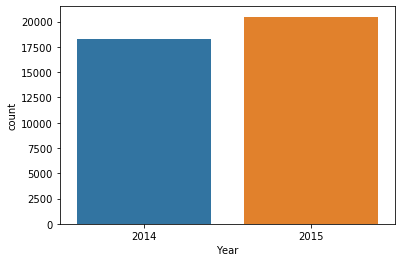

In [6]:
sns.countplot(df.Year)
plt.show()

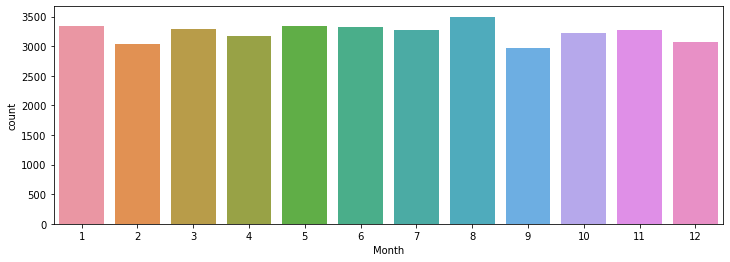

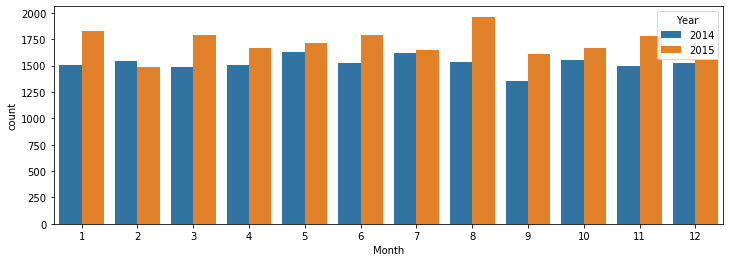

In [7]:
plt.figure(figsize=(12,4))
sns.countplot(df.Month)
plt.show()
plt.figure(figsize=(12,4))
sns.countplot(df.Month,hue=df.Year)
plt.show()

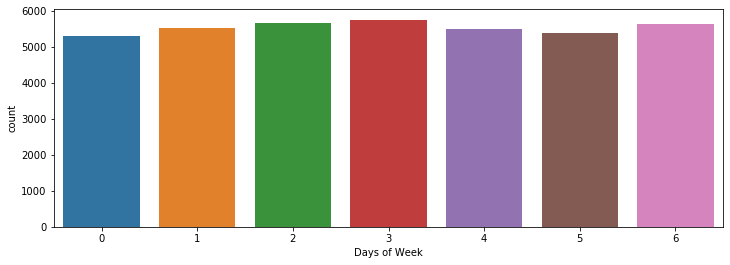

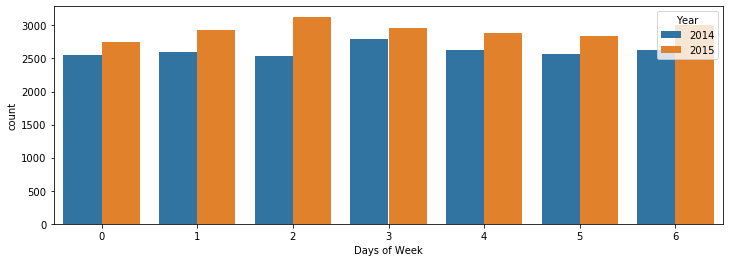

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(df['Days of Week'])
plt.show()
plt.figure(figsize=(12,4))
sns.countplot(df['Days of Week'],hue=df.Year)
plt.show()

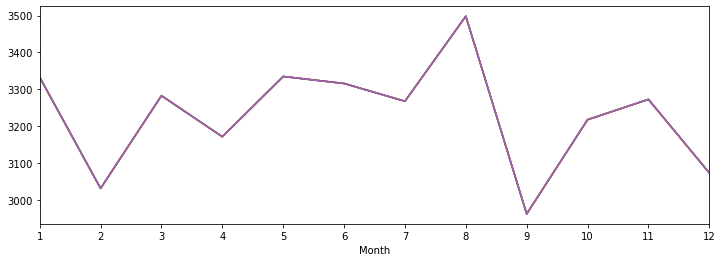

In [9]:
df.groupby('Month').count().plot(legend=False,figsize=(12,4))
plt.xticks([i for i in range(1,13)])
plt.show()

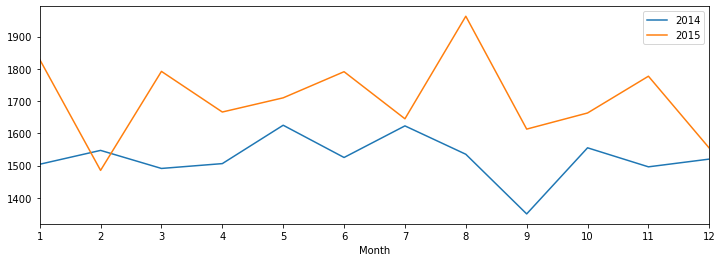

In [10]:
df[df['Year']==2014].groupby('Month').count()['Date'].plot(label=2014,figsize=(12,4))
df[df['Year']==2015].groupby('Month').count()['Date'].plot(label=2015)
plt.xticks([i for i in range(1,13)])
plt.legend()
plt.show()

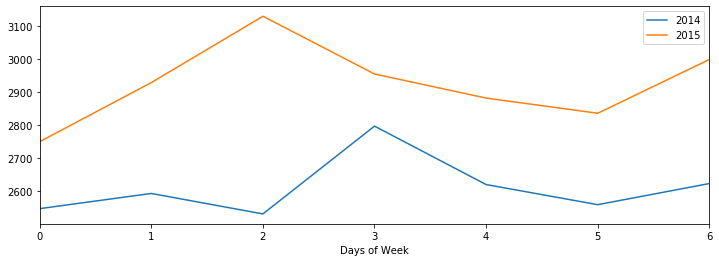

In [11]:
df[df['Year']==2014].groupby('Days of Week').count()['Date'].plot(label=2014,figsize=(12,4))
df[df['Year']==2015].groupby('Days of Week').count()['Date'].plot(label=2015)
plt.xticks([i for i in range(0,7)])
plt.legend()
plt.show()

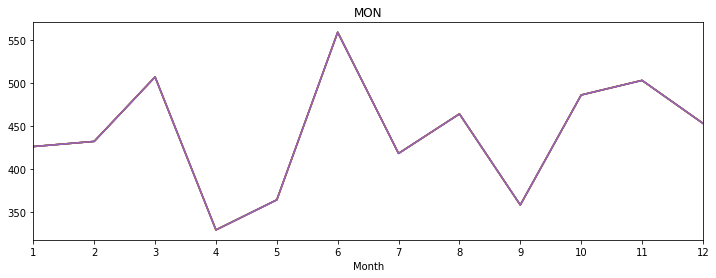

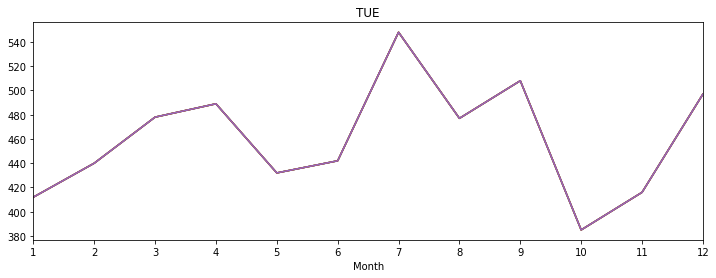

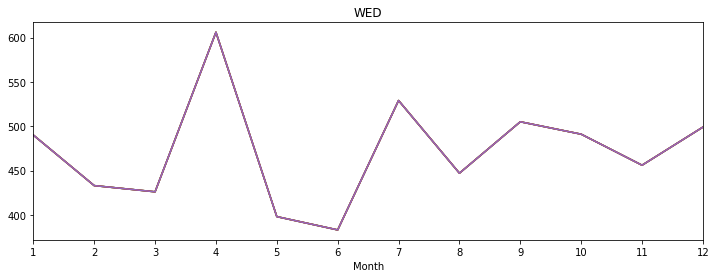

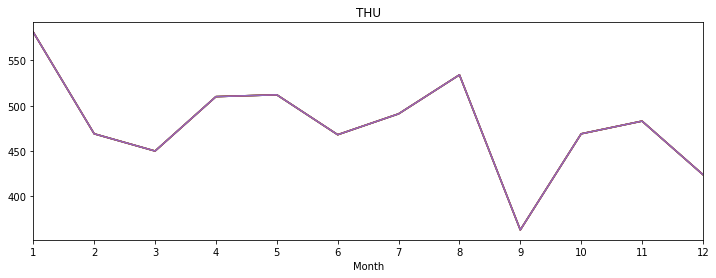

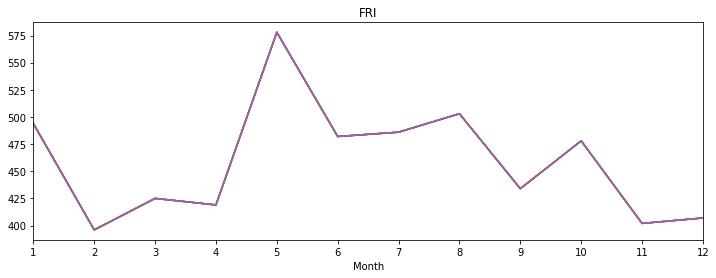

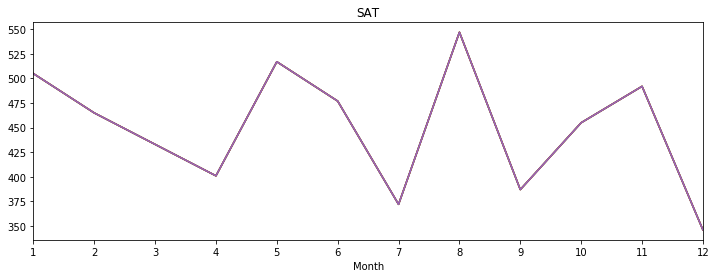

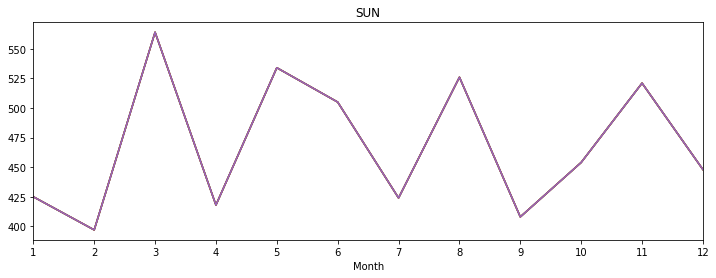

In [12]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
for i in range(0,7):
    df[df['Days of Week']==i].groupby('Month').count().plot(legend=False,figsize=(12,4))
    plt.xticks([i for i in range(1,13)])
    plt.title(days[i].upper())
    plt.show()

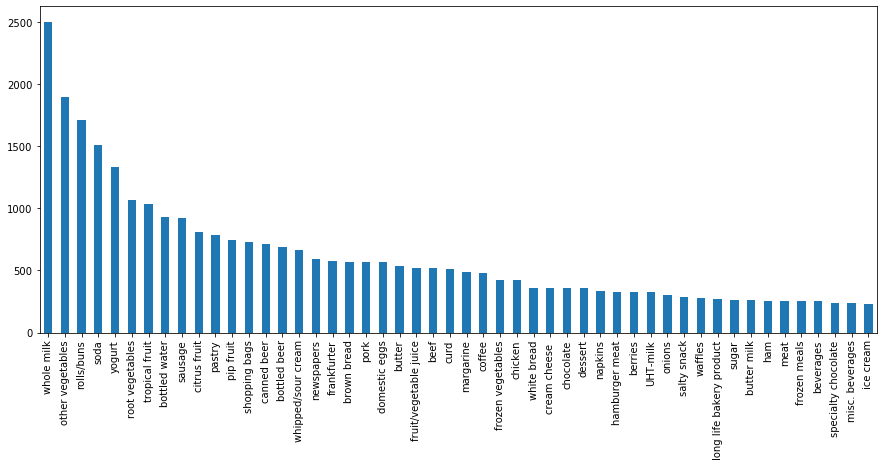

In [13]:
df.itemDescription.value_counts().head(50).plot(kind='bar',figsize=(15,6))
plt.show()

In [14]:
pd.DataFrame(df.itemDescription.value_counts()/len(df)).head()

,itemDescription
whole milk,0.064543
other vegetables,0.048962
rolls/buns,0.044267
soda,0.039056
yogurt,0.034412


In [15]:
dummies = pd.get_dummies(df.itemDescription)
dummies.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df = df.join(dummies)
df.head()

,Member_number,Date,itemDescription,Year,Month,Days of Week,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,tropical fruit,2015,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,2015-05-01,whole milk,2015,5,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,pip fruit,2015,9,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,other vegetables,2015,12,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,2015-01-02,whole milk,2015,1,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
item = df.itemDescription.unique()

In [18]:
df = df.groupby(['Member_number','Date'])[item[:]].sum()
df.head(10)

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          2014-06-24               0           1          0   
              2015-03-15               0           1          0   
              2015-05-27               0           0          0   
              2015-07-24               0           0          0   
              2015-11-25               0           0          0   
1001          2014-07-02               0           1          0   
              2014-12-12               0           1          0   
              2015-01-20               0           0          0   
              2015-02-05               0           0          0   
              2015-04-14               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          2014-06-24                 0           0           0   
              2015-03-15                 0           0           0   
              2015-05-27                 0           0           0   
              2015-07-24                 0           0           0   
              2015-11-25                 0           0           0   
1001          2014-07-02                 0           1           0   
              2014-12-12                 0           0           0   
              2015-01-20                 0           0           0   
              2015-02-05                 0           0           0   
              2015-04-14                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          2014-06-24             0     0            0        0  ...   
              2015-03-15             0     0            0        0  ...   
              2015-05-27             0     0            0        0  ...   
              2015-07-24             0     0            0        0  ...   
              2015-11-25             0     0            0        0  ...   
1001          2014-07-02             0     0            0        0  ...   
              2014-12-12             0     0            0        0  ...   
              2015-01-20             0     0            1        0  ...   
              2015-02-05             0     0            1        0  ...   
              2015-04-14             0     1            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          2014-06-24               0     0    0               0   
              2015-03-15               0     0    0               0   
              2015-05-27               0     0    0               0   
              2015-07-24               0     0    0               0   
              2015-11-25               0     0    0               0   
1001          2014-07-02               0     0    0               0   
              2014-12-12               0     0    0               0   
              2015-01-20               0     0    0               0   
              2015-02-05               0     0    0               0   
              2015-04-14               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          2014-06-24                     0               0            0   
              2015-03-15                     0               0            0   
              2015-05-27                     0               0            0   
              2015-07-24                     0               0            0   
              2015-11-25                     0               0            0   
1001          2014-07-02                     0               0           

In [19]:
df = df.reset_index()

In [20]:
df = df.drop(['Member_number','Date'],axis=1)

In [22]:
# Converting true values to its columns names

temp = df.copy()

for i in range(len(temp)):
    for j in (temp.columns):
        if temp.loc[i,j]>0:
            temp.loc[i,j]=j
temp.head(10)

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,whole milk,0,0,rolls/buns,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,frankfurter,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,frankfurter,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,beef,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
temp = temp.values
transactions = []
for i in range(14693):
    x=[]
    for j in range(167):
        if temp[i,j]!=0:
            x.append(temp[i,j])
    transactions.append(x)
transactions

[['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['whole milk', 'butter'],
 ['other vegetables', 'frozen vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['root vegetables', 'detergent'],
 ['rolls/buns', 'sausage'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['whole milk', 'root vegetables', 'pastry'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['other vegetables', 'hygiene articles'],
 